In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
#Loading the Built-in Sklearn Breast Cancer Dataset
cancerData = datasets.load_breast_cancer()

In [5]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = cancerData.target

In [7]:
X.shape

(569, 30)

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [9]:
X_train.shape


(512, 30)

In [10]:
y_test.shape

(57,)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#Reshaping the dataset to 3-D to pass it through CNN
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input

# Assuming X_train and X_test have been reshaped appropriately
X_train = X_train.reshape(512, 30, 1)
X_test = X_test.reshape(57, 30, 1)


In [16]:


input_shape = (30, 1)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 29, 16)         │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 28, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        28,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,033 (117.32 KB)

 Trainable params: 29,937 (116.94 KB)

 Non-trainable params: 96 (384.00 B)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6914 - loss: 0.6320 - val_accuracy: 0.8772 - val_loss: 0.6357
Epoch 2/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4762 - val_accuracy: 0.9649 - val_loss: 0.5918
Epoch 3/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.3656 - val_accuracy: 0.9298 - val_loss: 0.5529
Epoch 4/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.2891 - val_accuracy: 0.9298 - val_loss: 0.5169
Epoch 5/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.2650 - val_accuracy: 0.9123 - val_loss: 0.4815
Epoch 6/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8925 - loss: 0.2507 - val_accuracy: 0.9123 - val_loss: 0.4465
Epoch 7/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.1996 - val_accuracy: 0.9123 - val_loss: 0.4118
Epoch 8/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.1907 - val_accuracy: 0.9298 - val_loss:

In [19]:
#Plots of Accuracy and loss
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

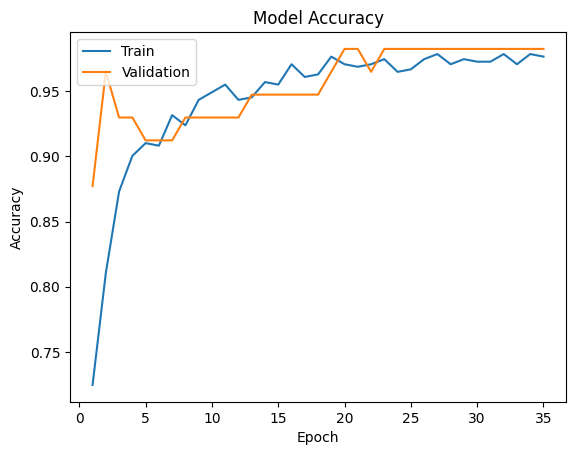

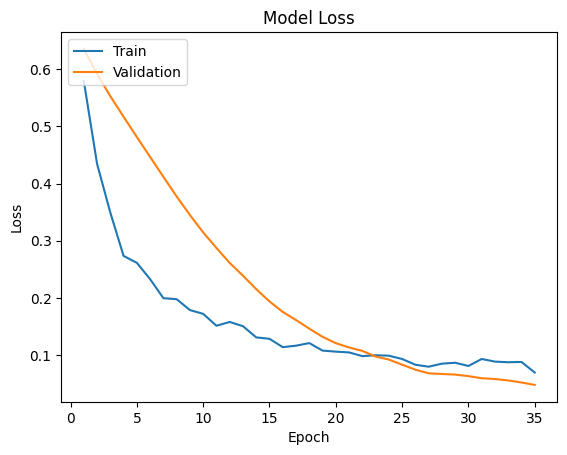

In [20]:
plotLearningCurve(history,35)